In [5]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [6]:
N1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test65 N1.csv.csv")
N2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test66 N2.csv.csv")
N3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test67 N3.csv.csv")

In [7]:
force_N1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#65 N1.log" , delimiter = "\t")
force_N2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#66 N2.log" , delimiter = "\t")
force_N3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#67 N3.log" , delimiter = "\t")


In [8]:
#Visulizing the force data - test #2 - 6 - N1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_N1 = force_N1["Time"]
x_force_N2 = force_N2["Time"]
x_force_N3 = force_N3["Time"]


#force
Load_N1 = force_N1["Load"]
Load_N2 = force_N2["Load"]
Load_N3 = force_N3["Load"]


#plt.plot(x_force_N1,Load_N1,color = 'green', label = 'force data N1' )
#plt.plot(x_force_N2,Load_N2,color = 'blue', label = 'force data N2 ' )
# plt.plot(x_force_N3,Load_N3,color = 'yellow', label = 'force data N3' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for N1


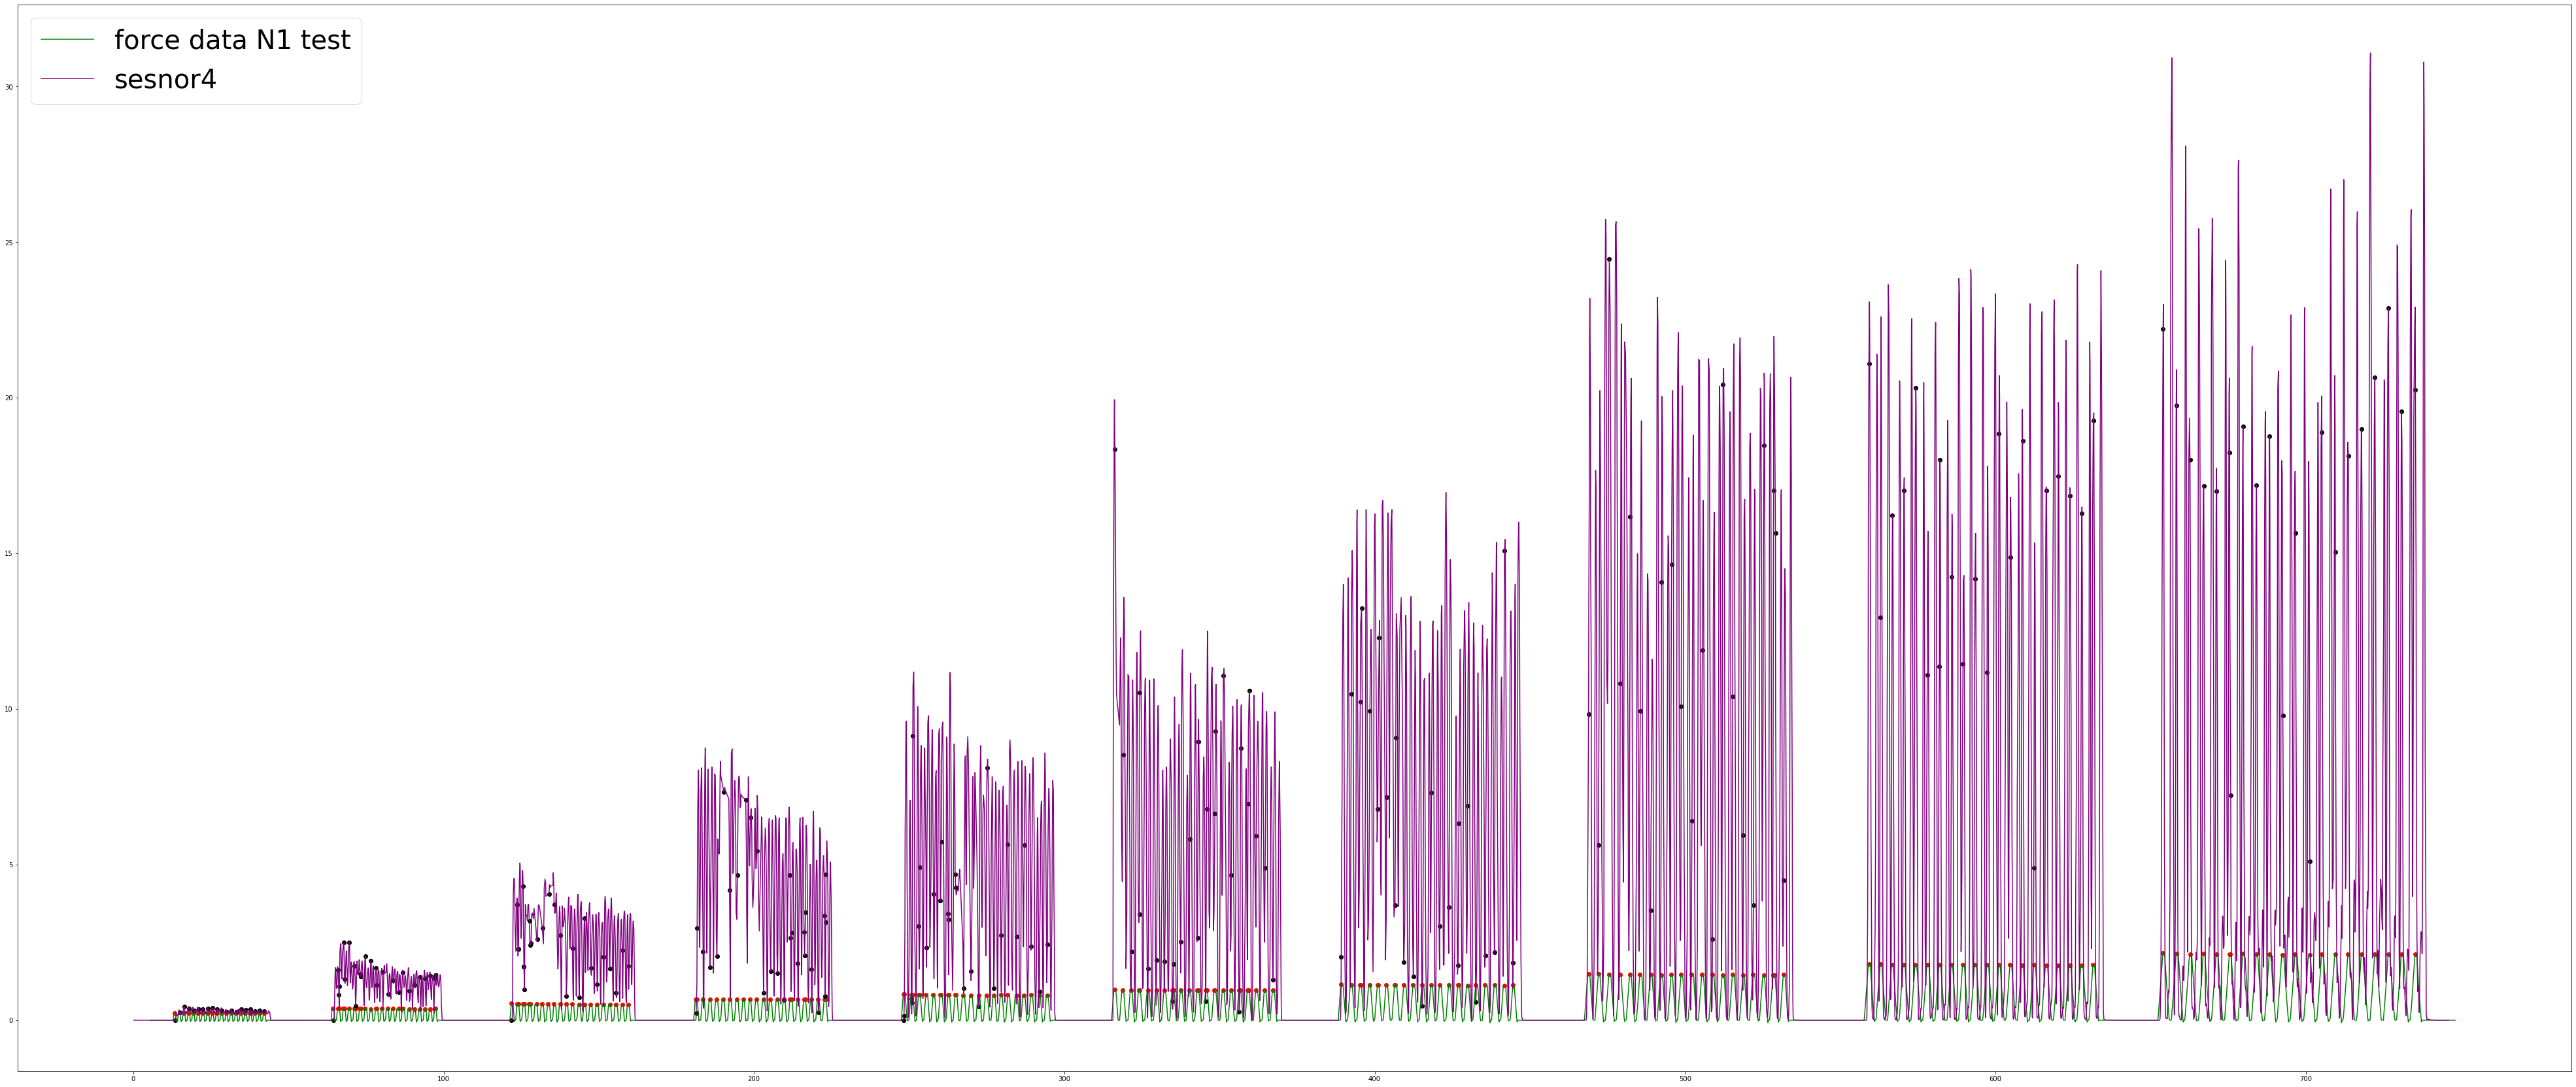

In [28]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - N1

plt.figure(figsize=(70, 30))

# plt.plot(N1["Unnamed: 0"],N1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(N1["Unnamed: 0"],N1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(N1["Unnamed: 0"],N1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(N1["Unnamed: 0"],N1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_N1 = x_force_N1 + 5.5
scaled_N1 = N1["Unnamed: 0"]

plt.plot(scaled_x_force_N1,Load_N1,color = 'green', label = 'force data N1 test' )
plt.plot(scaled_N1,N1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for N1")

#finding the peaks

pidx_Load_N1, _ = find_peaks(Load_N1,prominence= 0.05 )
peaks_Load_N1 = Load_N1[pidx_Load_N1]
peaks_Ltime_N1 = scaled_x_force_N1[pidx_Load_N1]

plt.scatter(peaks_Ltime_N1,peaks_Load_N1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_N1time = []

peaks_Ltime_N1.reset_index(drop = True, inplace = True)
peaks_Load_N1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_N1)):
    idx_N1time.append(bisect.bisect_left(N1["Unnamed: 0"], peaks_Ltime_N1[i]))

plt.scatter(N1["Unnamed: 0"][idx_N1time],N1["s4_d"][idx_N1time],color = 'black')

In [29]:
#Storing the peaks into csv file - N1
Load_N1peaks =[]

for i in range(len(peaks_Load_N1)):
    Load_N1peaks.append(peaks_Load_N1[i])
    
content_N1 = {'R1':N1["s1_d"][idx_N1time],
              'R2':N1["s2_d"][idx_N1time],
              'R3':N1["s3_d"][idx_N1time],
              'R4':N1["s4_d"][idx_N1time], 
              'Load': Load_N1peaks} 

df_N1 = pd.DataFrame(content_N1, columns = ['R1','R2','R3','R4','Load'])

df_N1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\N1.csv',index = False, header = True)

Sensor 1 is more profound for N2


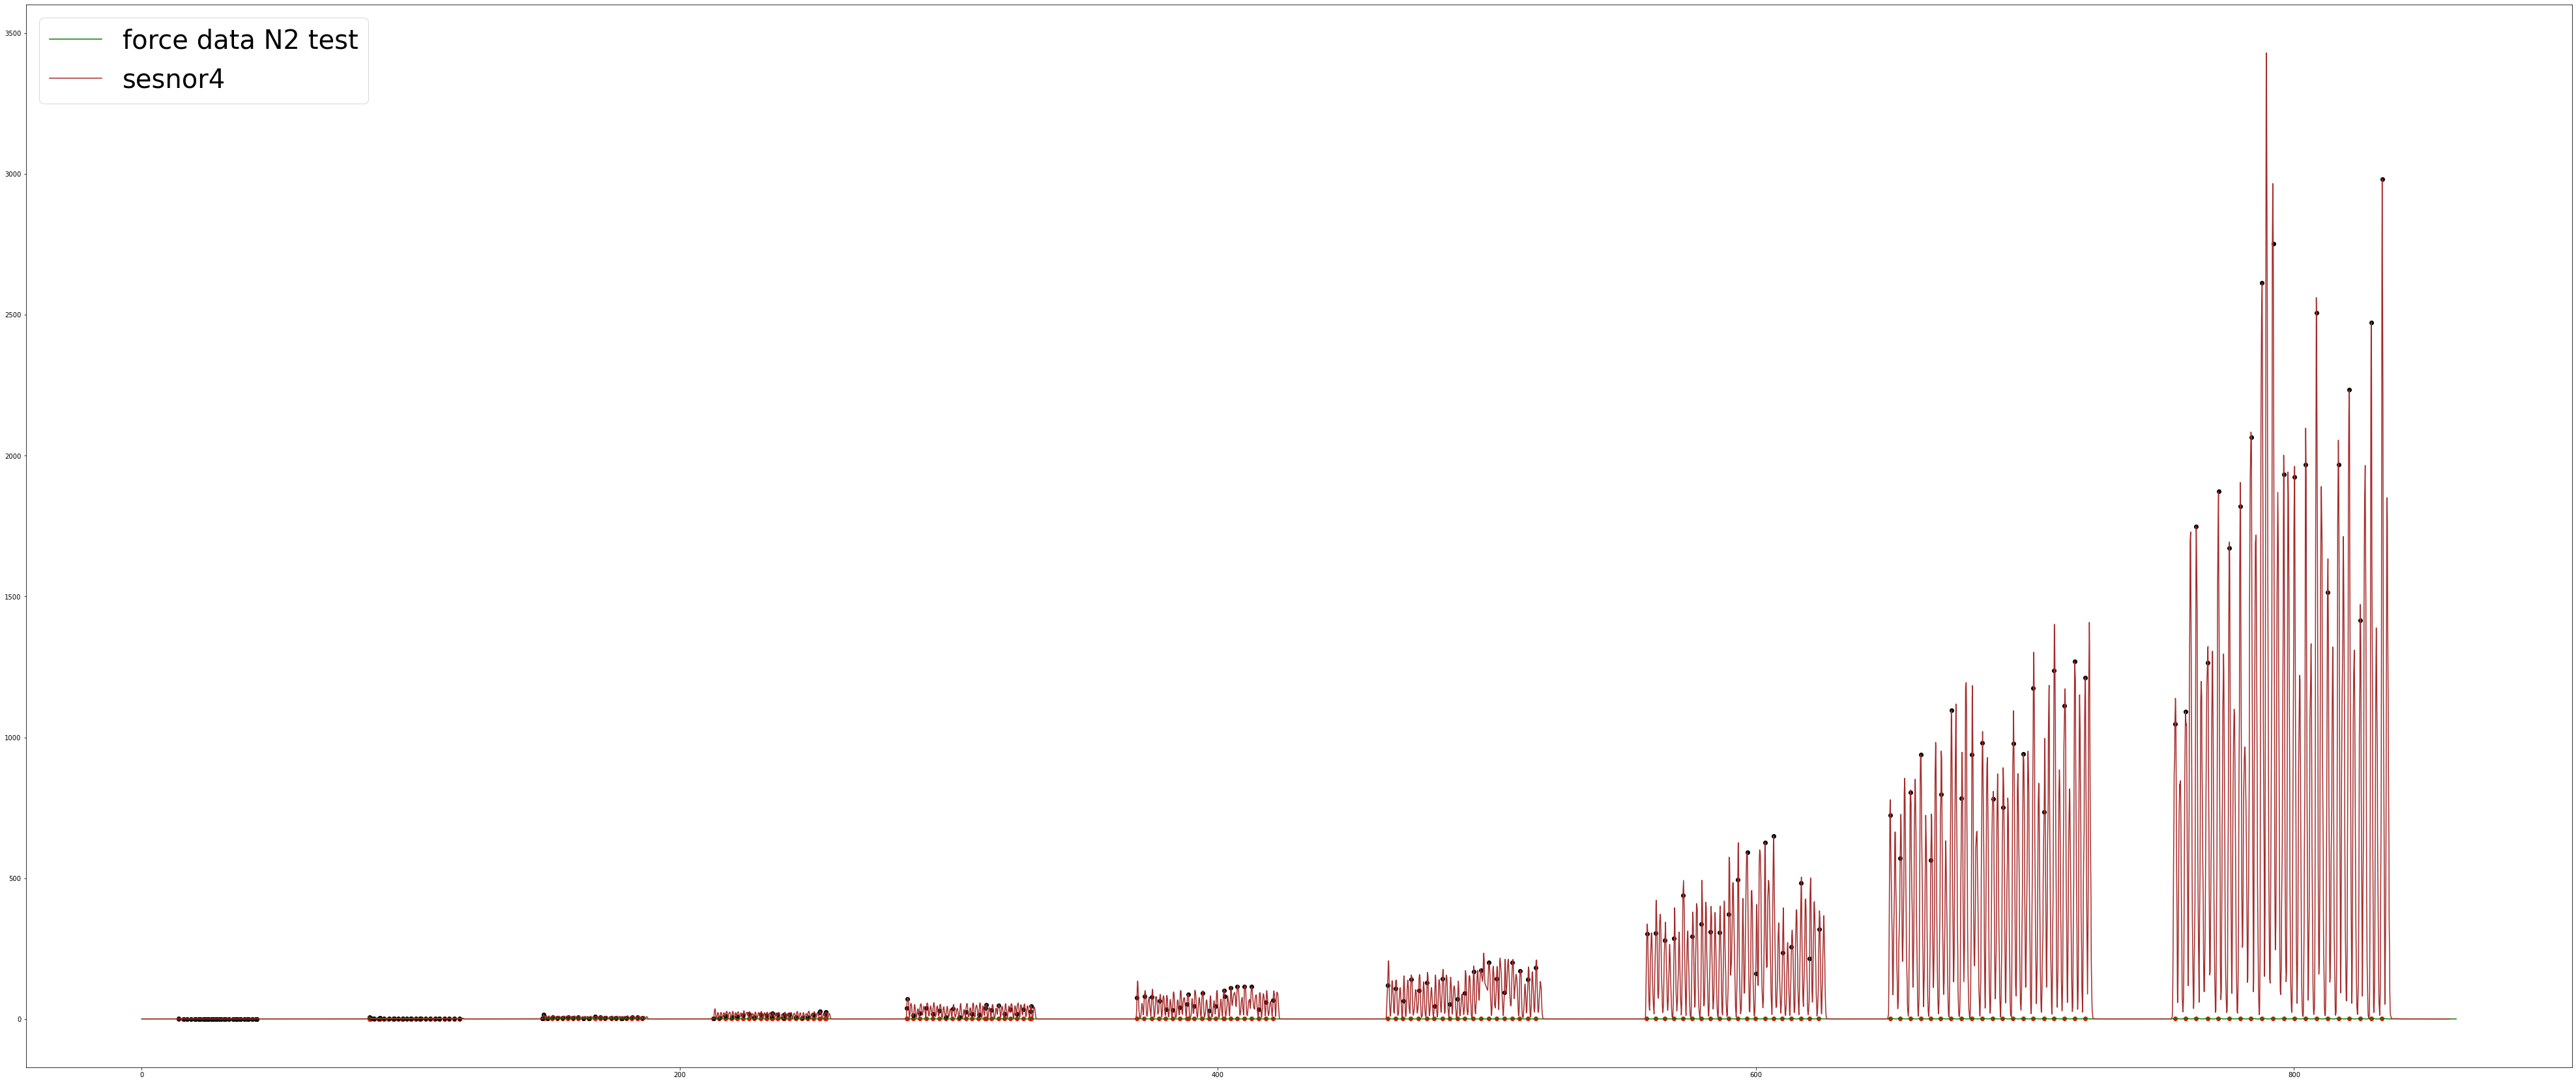

In [32]:
#visualizing and syncing the resistance data for each sensor S 1- 4- N2

plt.figure(figsize=(70, 30))

# plt.plot(N2["Unnamed: 0"],N2["s1_d"], color = 'brown', label = 'sesnor1')
# plt.plot(N2["Unnamed: 0"],N2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(N2["Unnamed: 0"],N2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(N2["Unnamed: 0"],N2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_N2 = x_force_N2
scaled_N2 = N2["Unnamed: 0"]

plt.plot(scaled_x_force_N2,Load_N2,color = 'green', label = 'force data N2 test' )
plt.plot(scaled_N2,N2["s1_d"], color = 'brown', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 1 is more profound for N2")

#finding the peaks

pidx_Load_N2, _ = find_peaks(Load_N2,prominence= 0.05 )
peaks_Load_N2 = Load_N2[pidx_Load_N2]
peaks_Ltime_N2 = scaled_x_force_N2[pidx_Load_N2]

plt.scatter(peaks_Ltime_N2,peaks_Load_N2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_N2time = []

peaks_Ltime_N2.reset_index(drop = True, inplace = True)
peaks_Load_N2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_N2)):
    idx_N2time.append(bisect.bisect_left(N2["Unnamed: 0"], peaks_Ltime_N2[i]))

plt.scatter(N2["Unnamed: 0"][idx_N2time],N2["s1_d"][idx_N2time],color = 'black')

In [33]:
#Storing the peaks into csv file - N2
Load_N2peaks =[]

for i in range(len(peaks_Load_N2)):
    Load_N2peaks.append(peaks_Load_N2[i])
    
content_N2 = {'R1':N2["s1_d"][idx_N2time],
              'R2':N2["s2_d"][idx_N2time],
              'R3':N2["s3_d"][idx_N2time],
              'R4':N2["s4_d"][idx_N2time], 
              'Load': Load_N2peaks} 

df_N2 = pd.DataFrame(content_N2, columns = ['R1','R2','R3','R4','Load'])

df_N2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\N2.csv',index = False, header = True)

Sensor 4 is more profound for N3


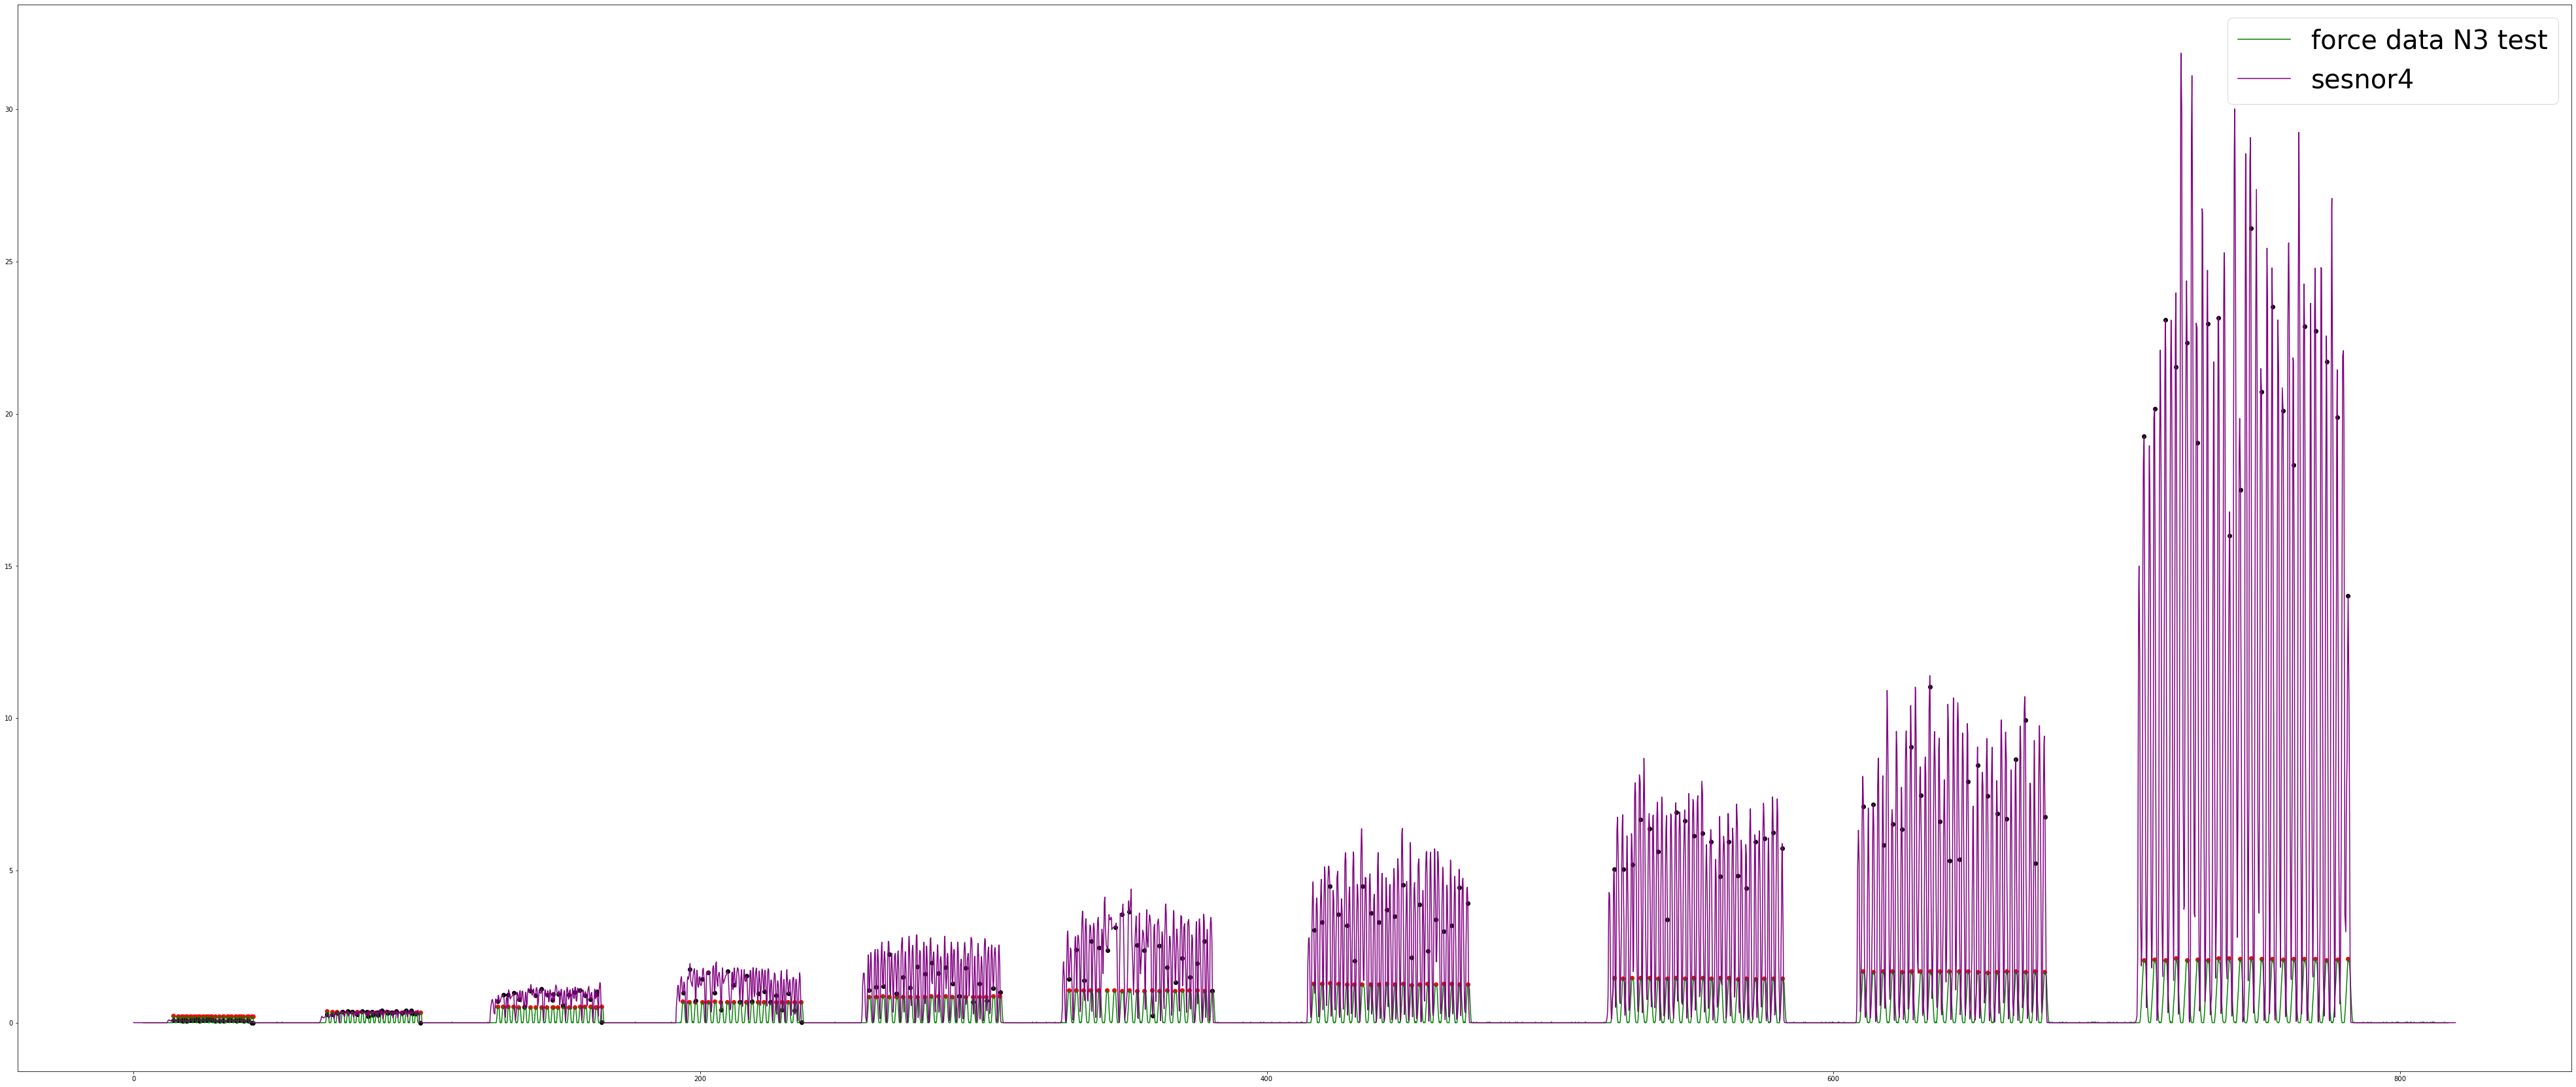

In [36]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - N3

plt.figure(figsize=(70, 30))

# plt.plot(N3["Unnamed: 0"],N3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(N3["Unnamed: 0"],N3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(N3["Unnamed: 0"],N3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(N3["Unnamed: 0"],N3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_N3 = x_force_N3 + 3.5
scaled_N3 = N3["Unnamed: 0"]

plt.plot(scaled_x_force_N3,Load_N3,color = 'green', label = 'force data N3 test' )
plt.plot(scaled_N3,N3["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for N3")

#finding the peaks

pidx_Load_N3, _ = find_peaks(Load_N3,prominence= 0.05 )
peaks_Load_N3 = Load_N3[pidx_Load_N3]
peaks_Ltime_N3 = scaled_x_force_N3[pidx_Load_N3]

plt.scatter(peaks_Ltime_N3,peaks_Load_N3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_N3time = []

peaks_Ltime_N3.reset_index(drop = True, inplace = True)
peaks_Load_N3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_N3)):
    idx_N3time.append(bisect.bisect_left(N3["Unnamed: 0"], peaks_Ltime_N3[i]))

plt.scatter(N3["Unnamed: 0"][idx_N3time],N3["s4_d"][idx_N3time],color = 'black')

In [37]:
#Storing the peaks into csv file - N3
Load_N3peaks =[]

for i in range(len(peaks_Load_N3)):
    Load_N3peaks.append(peaks_Load_N3[i])
    
content_N3 = {'R1':N3["s1_d"][idx_N3time],
              'R2':N3["s2_d"][idx_N3time],
              'R3':N3["s3_d"][idx_N3time],
              'R4':N3["s4_d"][idx_N3time], 
              'Load': Load_N3peaks} 

df_N3 = pd.DataFrame(content_N3, columns = ['R1','R2','R3','R4','Load'])

df_N3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\N3.csv',index = False, header = True)